# Project

* https://www.kaggle.com/competitions/santander-customer-satisfaction

* Customer satisfaction is an important measure of success. Unhappy customers don't stay with companies but they also do not always voice their dissatisfaction before leaving. Santander Bank wants help in indentifying unsatisfied customers earlier.

* We are given a large amount of anonymized features. Also a target column of either 1 for unsatisfied customers or 0 for satisfied customers. The task is to predict the probability that each customer is unsatisfied.

* This is supervised binary classification.

# Data Loading and Initial Look

In [1]:
import opendatasets as od
import pandas as pd
import zipfile
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import IncrementalPCA
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [7]:
csv_file = 'C:/Users/aemsh/Desktop/DATA4380/santander-customer-satisfaction/train.csv'

In [8]:
df = pd.read_csv(csv_file)

In [9]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [10]:
df.shape

(76020, 371)

In [6]:
df.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

Check for missing variables and duplicates

In [7]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
df.duplicated().sum()

0

Get rid of columns with all zero values.

In [11]:
# Filter out columns with all zero values
filtered_df = df.loc[:, (df != 0).any(axis=0)]

print("Original shape:", df.shape)
print("Filtered shape:", filtered_df.shape)

df = filtered_df

Original shape: (76020, 371)
Filtered shape: (76020, 337)


Drop ID column

In [12]:
df.drop(labels=['ID'], axis=1, inplace = True)

Remove outliers

In [13]:
from scipy import stats

# Calculate z-scores for each column
z_scores = stats.zscore(df)

threshold = 5

# find
outliers = (z_scores > threshold).any(axis=1)

# remove
cleaned_df = df[~outliers]

In [14]:
cleaned_df.shape

(61969, 336)

In [15]:
df = cleaned_df

Balance the weight of classes

In [16]:
class_counts = df['TARGET'].value_counts()
class_weights = {0: 1.0, 1: 0.8 * (class_counts[0] / class_counts[1])}

# Data Visualization

In [17]:
df_0=df[df['TARGET']==0]
df_1=df[df['TARGET']==1]

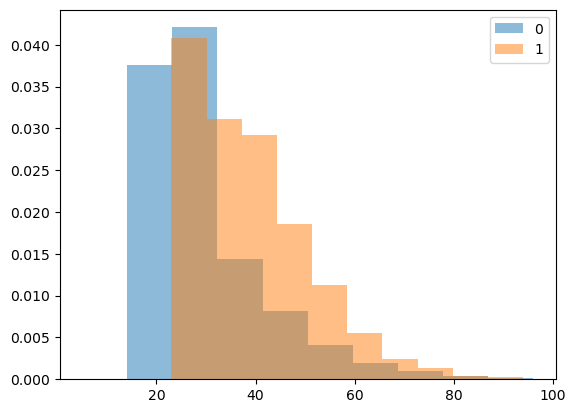

In [18]:
plt.hist(df_0['var15'], density=1, alpha=0.5, label='0')
plt.hist(df_1['var15'], density=1, alpha=0.5, label='1')
plt.legend()

(array([59458.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2511.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

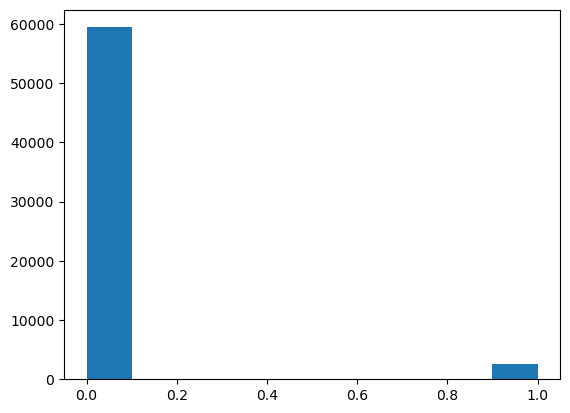

In [19]:
plt.hist(df['TARGET'])

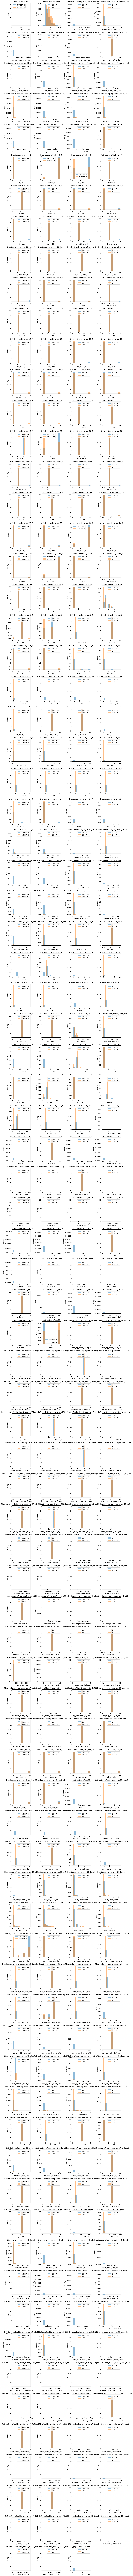

In [11]:
# Sample a portion of the data
sample_frac = 0.1 
df_sampled = df.sample(frac=sample_frac, random_state=42)

# separate
df_0 = df_sampled[df_sampled['TARGET'] == 0]
df_1 = df_sampled[df_sampled['TARGET'] == 1]

# features
features_to_plot = df.columns[df.columns != 'TARGET']

num_features = len(features_to_plot)
num_cols = 4  # adjust
num_rows = -(-num_features // num_cols)  # Ceiling division to calculate the number of rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

# Flatten the axs array to iterate over subplots
axs = axs.flatten()

# Iterate
for i, feature in enumerate(features_to_plot):
    axs[i].hist(df_0[feature], density=1, alpha=0.5, label='TARGET=0')
    axs[i].hist(df_1[feature], density=1, alpha=0.5, label='TARGET=1')
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Density')
    axs[i].legend()

# Hide any unused subplots
for j in range(num_features, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


# Machine Learning

Check correlation and promising features

In [21]:
from scipy.stats import chi2_contingency

binary_features = df

# contingency table
contingency_tables = {}
for feature in binary_features.columns[:-1]:  # Exclude the target column
    contingency_table = pd.crosstab(binary_features[feature], binary_features['TARGET'])
    contingency_tables[feature] = contingency_table

# Calculate correlation
correlation_with_target = {}
for feature, contingency_table in contingency_tables.items():
    chi2, p, _, _ = chi2_contingency(contingency_table)
    correlation_with_target[feature] = np.sqrt(chi2 / (len(df) * (2 - 1))) * (1 if p < 0.05 else 0)

# sort
correlation_with_target = dict(sorted(correlation_with_target.items(), key=lambda x: x[1], reverse=True))

for feature, correlation in correlation_with_target.items():
    print(f"Correlation between {feature} and target: {correlation}")

Correlation between var15 and target: 0.1876743778296203
Correlation between num_meses_var5_ult3 and target: 0.16383851512234882
Correlation between num_var35 and target: 0.161736402234694
Correlation between num_var4 and target: 0.16173044217165153
Correlation between num_var30 and target: 0.1613818321531224
Correlation between ind_var30 and target: 0.16124881122457518
Correlation between num_var42 and target: 0.16020562606461886
Correlation between num_var5 and target: 0.15983792501199054
Correlation between ind_var5 and target: 0.15974902469733934
Correlation between var36 and target: 0.11126616419061253
Correlation between num_meses_var39_vig_ult3 and target: 0.060162432965413175
Correlation between imp_op_var41_efect_ult3 and target: 0.05963818645969912
Correlation between imp_op_var39_efect_ult3 and target: 0.05963818645969912
Correlation between imp_op_var41_efect_ult1 and target: 0.050298255924084774
Correlation between imp_op_var39_efect_ult1 and target: 0.050298255924084774
C

In [22]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Define class weights
# Balanced automatically computes weight inversely proportional to class frequencies in the input data
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

# initialize with class weights
model = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})

# train
model.fit(X_train, y_train)

# evauate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     11899
           1       0.12      0.10      0.11       495

    accuracy                           0.94     12394
   macro avg       0.54      0.54      0.54     12394
weighted avg       0.93      0.94      0.93     12394



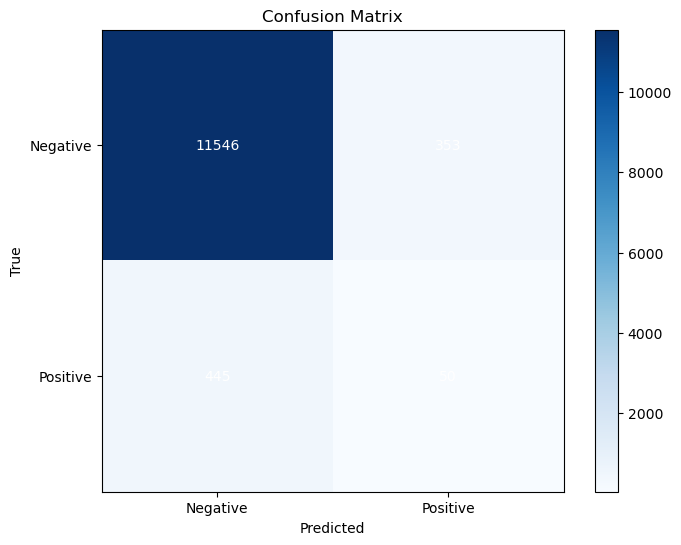

C:\Users\aemsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

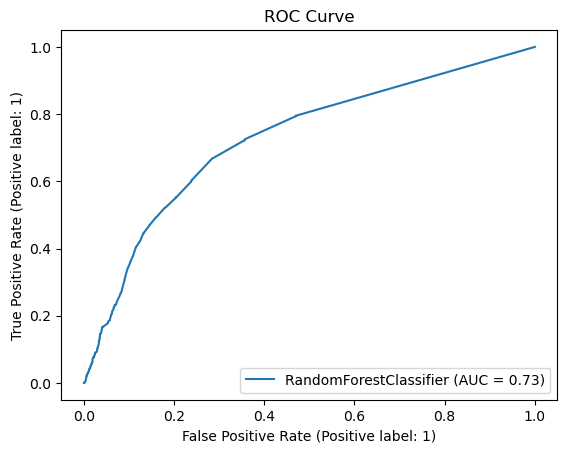

C:\Users\aemsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

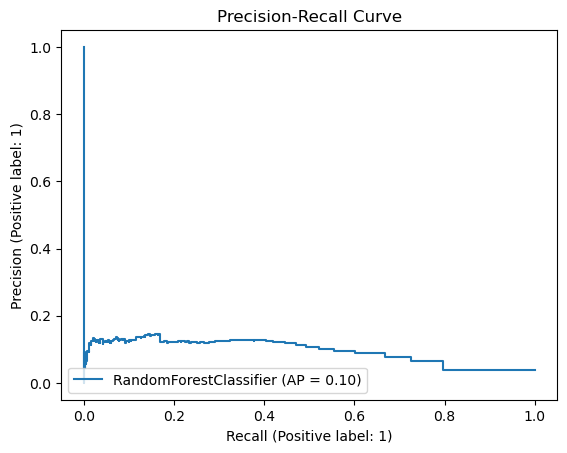

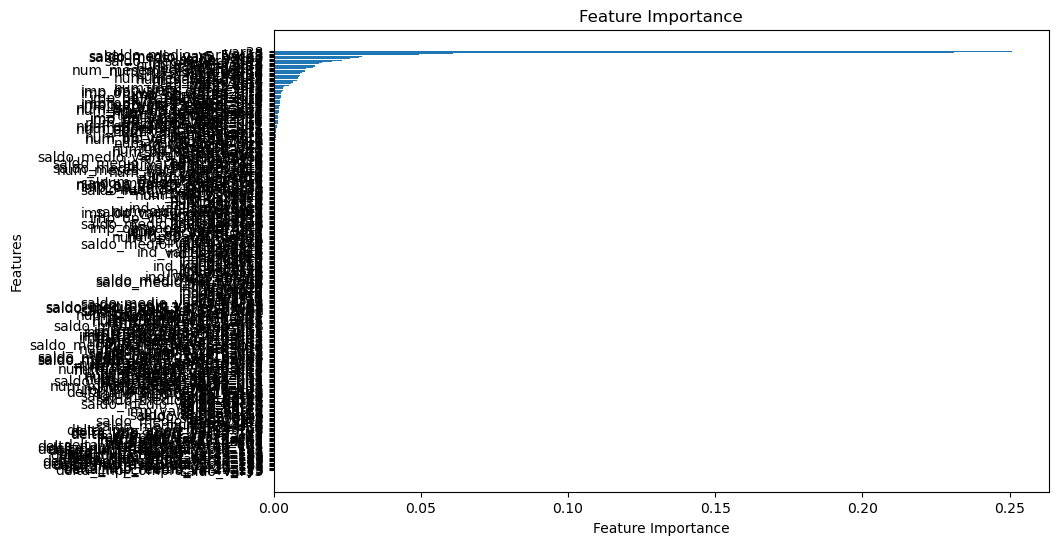

In [24]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
plot_roc_curve(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
plot_precision_recall_curve(model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

# Feature Importance
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


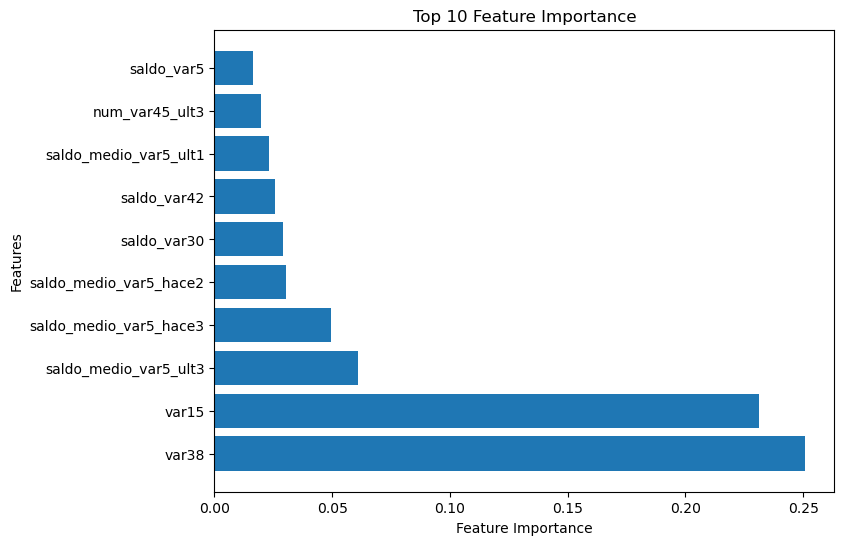

In [25]:
# Get the top most important features
N = 10  # Number of top features to plot
top_features = X_train.columns[sorted_idx][-N:]
top_importance = feature_importance[sorted_idx][-N:]

plt.figure(figsize=(8, 6))
plt.barh(top_features, top_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top {} Feature Importance'.format(N))
plt.gca().invert_yaxis()  # highest importance at top
plt.show()


# Compute score

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.